<a href="https://colab.research.google.com/github/Richish/Vision-Projects/blob/main/PretrainedImageClassifierForSingleImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.16 s (started: 2021-11-30 13:05:49 +00:00)


# Classify a cat image using resnet50

1. Load image
2. resize
3. scale values
4. select pretrained model
5. run pretrained model to get category predictions
6. o/p categories with highest probabilities

In [43]:
import tensorflow as tf



time: 2.19 ms (started: 2021-11-30 13:05:52 +00:00)


In [44]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

time: 3.27 ms (started: 2021-11-30 13:05:52 +00:00)


In [45]:
! ls sample_data/images/cat.jpg

sample_data/images/cat.jpg
time: 143 ms (started: 2021-11-30 13:05:52 +00:00)


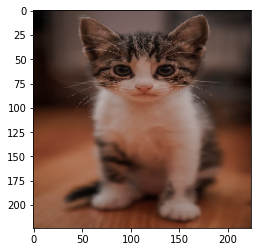

time: 223 ms (started: 2021-11-30 13:05:52 +00:00)


In [46]:
img_path="sample_data/images/cat.jpg"
img = image.load_img(path=img_path, target_size=(224,224))
plt.imshow(img)
plt.show()

## Converting image to a batch of 1 images

In [47]:
img_array = image.img_to_array(img) # converting image to an array of (224,224,3)
img_batch = np.expand_dims(img_array, axis=0) # creating a batch of image arrays though the batch contains only 1 image
img_batch

array([[[[  6.,   4.,   5.],
         [  7.,   5.,   6.],
         [  7.,   5.,   6.],
         ...,
         [ 22.,  18.,  17.],
         [ 19.,  18.,  16.],
         [ 18.,  17.,  15.]],

        [[  4.,   4.,   4.],
         [  7.,   7.,   7.],
         [  5.,   5.,   5.],
         ...,
         [ 25.,  21.,  20.],
         [ 24.,  20.,  19.],
         [ 24.,  20.,  19.]],

        [[  6.,   4.,   5.],
         [  6.,   4.,   5.],
         [  7.,   5.,   6.],
         ...,
         [ 27.,  23.,  22.],
         [ 24.,  23.,  21.],
         [ 23.,  22.,  20.]],

        ...,

        [[134.,  86.,  63.],
         [136.,  88.,  65.],
         [137.,  89.,  66.],
         ...,
         [101.,  55.,  32.],
         [ 95.,  53.,  29.],
         [ 89.,  47.,  25.]],

        [[133.,  87.,  63.],
         [133.,  87.,  63.],
         [135.,  87.,  64.],
         ...,
         [ 97.,  51.,  28.],
         [ 90.,  48.,  26.],
         [ 86.,  43.,  24.]],

        [[129.,  83.,  59.],
       

time: 12.3 ms (started: 2021-11-30 13:05:52 +00:00)


## preprocess and predict

In [48]:
img_preprocessed = preprocess_input(img_batch)
img_preprocessed

array([[[[ -98.939    , -112.779    , -117.68     ],
         [ -97.939    , -111.779    , -116.68     ],
         [ -97.939    , -111.779    , -116.68     ],
         ...,
         [ -86.939    ,  -98.779    , -101.68     ],
         [ -87.939    ,  -98.779    , -104.68     ],
         [ -88.939    ,  -99.779    , -105.68     ]],

        [[ -99.939    , -112.779    , -119.68     ],
         [ -96.939    , -109.779    , -116.68     ],
         [ -98.939    , -111.779    , -118.68     ],
         ...,
         [ -83.939    ,  -95.779    ,  -98.68     ],
         [ -84.939    ,  -96.779    ,  -99.68     ],
         [ -84.939    ,  -96.779    ,  -99.68     ]],

        [[ -98.939    , -112.779    , -117.68     ],
         [ -98.939    , -112.779    , -117.68     ],
         [ -97.939    , -111.779    , -116.68     ],
         ...,
         [ -81.939    ,  -93.779    ,  -96.68     ],
         [ -82.939    ,  -93.779    ,  -99.68     ],
         [ -83.939    ,  -94.779    , -100.68     ]],

time: 13.1 ms (started: 2021-11-30 13:05:52 +00:00)


In [49]:
model = ResNet50()

time: 1.93 s (started: 2021-11-30 13:05:52 +00:00)


In [50]:
predictions = model.predict(img_preprocessed)
predictions

array([[6.65373090e-09, 4.85558985e-07, 1.12181384e-08, 1.26397675e-08,
        1.87764670e-07, 4.84935860e-08, 3.12831290e-08, 4.53079423e-08,
        3.31364760e-07, 5.82153746e-07, 7.62334878e-07, 8.52669899e-08,
        9.05662461e-08, 1.48939762e-07, 1.06773017e-08, 1.60257997e-07,
        6.12127167e-08, 5.41586701e-07, 5.50867441e-08, 1.06910978e-08,
        7.00355486e-07, 9.45327145e-07, 1.77394526e-07, 6.74191710e-07,
        4.01182803e-07, 1.21384938e-08, 7.14277348e-08, 4.62564884e-08,
        1.45021000e-08, 1.26428489e-07, 8.96369954e-07, 8.81575843e-08,
        4.13154773e-08, 4.62939127e-08, 1.97007012e-07, 1.87034786e-07,
        8.16347153e-07, 3.04461309e-07, 1.40046325e-06, 3.81715992e-08,
        1.37528788e-08, 2.28729448e-07, 8.06765925e-08, 7.16645332e-07,
        2.03297915e-07, 1.24946723e-07, 1.83578550e-07, 1.70945370e-07,
        2.89844149e-08, 1.37253640e-08, 2.16686526e-08, 1.21258256e-06,
        4.21955122e-07, 2.09843218e-08, 2.00162873e-07, 5.214265

time: 1.15 s (started: 2021-11-30 13:05:54 +00:00)


In [51]:
decode_predictions(predictions, top=3)[0] # prediction probabilities for first element of batch of inputs

[('n02124075', 'Egyptian_cat', 0.5868383),
 ('n02123045', 'tabby', 0.24926549),
 ('n02123159', 'tiger_cat', 0.12530474)]

time: 3.89 ms (started: 2021-11-30 13:05:55 +00:00)


## Defining functions

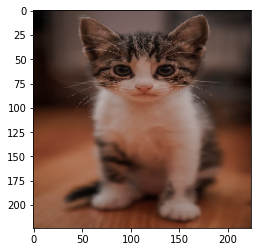

time: 225 ms (started: 2021-11-30 13:05:55 +00:00)


In [52]:
def show_image(image_path):
    img = image.load_img(path=img_path, target_size=(224,224))
    plt.imshow(img)
    plt.show()
show_image(img_path)

In [53]:
def get_image_classifications(image_path, model=ResNet50()):
    img = image.load_img(path=image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    predictions = model.predict(img_preprocessed)
    return decode_predictions(predictions, top=3)

get_image_classifications(img_path)

[[('n02124075', 'Egyptian_cat', 0.5868383),
  ('n02123045', 'tabby', 0.24926549),
  ('n02123159', 'tiger_cat', 0.12530474)]]

time: 3.91 s (started: 2021-11-30 13:05:56 +00:00)


In [54]:
get_image_classifications("sample_data/images/dog.jpg")

[[('n02088364', 'beagle', 0.7092907),
  ('n02089867', 'Walker_hound', 0.17349207),
  ('n02089973', 'English_foxhound', 0.036922112)]]

time: 250 ms (started: 2021-11-30 13:05:59 +00:00)
